<a href="https://colab.research.google.com/github/Salanakya/CV-projekt/blob/main/flightdelays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2015 Flight Delays and Cancellations
Which airline should you fly on to avoid significant delays?
https://www.kaggle.com/datasets/usdot/flight-delays

##Kaggle - dataset import

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d usdot/flight-delays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
flight-delays.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip flight-delays.zip

Archive:  flight-delays.zip
replace airlines.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

##Data exploration and preprocessing

In [ ]:
airlines = pd.read_csv('airlines.csv')
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [ ]:
flights = pd.read_csv('flights.csv')
flights

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
#missing values
flights.isnull().mean()

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.002530
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.014805
DEPARTURE_DELAY        0.014805
TAXI_OUT               0.015303
WHEELS_OFF             0.015303
SCHEDULED_TIME         0.000001
ELAPSED_TIME           0.018056
AIR_TIME               0.018056
DISTANCE               0.000000
WHEELS_ON              0.015898
TAXI_IN                0.015898
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.015898
ARRIVAL_DELAY          0.018056
DIVERTED               0.000000
CANCELLED              0.000000
CANCELLATION_REASON    0.984554
AIR_SYSTEM_DELAY       0.817250
SECURITY_DELAY         0.817250
AIRLINE_DELAY          0.817250
LATE_AIRCRAFT_DELAY    0.817250
WEATHER_DELAY          0.817250
dtype: f

In [ ]:
flights.isna().mean() >0.25

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER            False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME         False
DEPARTURE_DELAY        False
TAXI_OUT               False
WHEELS_OFF             False
SCHEDULED_TIME         False
ELAPSED_TIME           False
AIR_TIME               False
DISTANCE               False
WHEELS_ON              False
TAXI_IN                False
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME           False
ARRIVAL_DELAY          False
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

In [ ]:
#dropping columns that are less than 25% full and irrelevant ones such as year, flight number, and tail number

empty_columns = flights.loc[:, flights.isna().mean() >=0.25].columns
flights = flights.drop(empty_columns, axis=1)
flights = flights.drop(['YEAR', 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,22.0,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,17.0,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,17.0,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,10.0,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [ ]:
#dropping empty rows as they are less than 2% of dataset volume
flights = flights.dropna(axis=0)

In [ ]:
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,16.0,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,15.0,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,11.0,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,22.0,...,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0
5819075,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,17.0,...,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0
5819076,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,17.0,...,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0
5819077,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,10.0,...,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0


In [ ]:
flights.isnull().mean()

MONTH                  0.0
DAY                    0.0
DAY_OF_WEEK            0.0
AIRLINE                0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_TIME         0.0
DEPARTURE_DELAY        0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
SCHEDULED_TIME         0.0
ELAPSED_TIME           0.0
AIR_TIME               0.0
DISTANCE               0.0
WHEELS_ON              0.0
TAXI_IN                0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_TIME           0.0
ARRIVAL_DELAY          0.0
DIVERTED               0.0
CANCELLED              0.0
dtype: float64

In [ ]:
# joining airlines
flights = flights.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [ ]:
# dropping old column and renaming new one
flights = flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flights = flights.rename(columns={"AIRLINE_y":"AIRLINE"})

In [ ]:
flights

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE
0,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,15.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,Alaska Airlines Inc.
1,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,35.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,Alaska Airlines Inc.
2,1,1,4,ANC,SEA,45,41.0,-4.0,17.0,58.0,...,173.0,1448,451.0,4.0,509,455.0,-14.0,0,0,Alaska Airlines Inc.
3,1,1,4,ANC,PDX,50,46.0,-4.0,11.0,57.0,...,187.0,1542,504.0,3.0,525,507.0,-18.0,0,0,Alaska Airlines Inc.
4,1,1,4,FAI,SEA,115,107.0,-8.0,25.0,132.0,...,186.0,1533,538.0,7.0,548,545.0,-3.0,0,0,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,12,31,4,LGA,DAL,1855,1847.0,-8.0,10.0,1857.0,...,231.0,1381,2148.0,6.0,2200,2154.0,-6.0,0,0,Virgin America
5714004,12,31,4,BOS,SFO,1859,1849.0,-10.0,12.0,1901.0,...,357.0,2704,2158.0,6.0,2250,2204.0,-46.0,0,0,Virgin America
5714005,12,31,4,SFO,LAS,1940,1933.0,-7.0,10.0,1943.0,...,58.0,414,2041.0,11.0,2110,2052.0,-18.0,0,0,Virgin America
5714006,12,31,4,LAX,LAS,1950,1948.0,-2.0,7.0,1955.0,...,39.0,236,2034.0,10.0,2055,2044.0,-11.0,0,0,Virgin America


##Visual Data Analysis

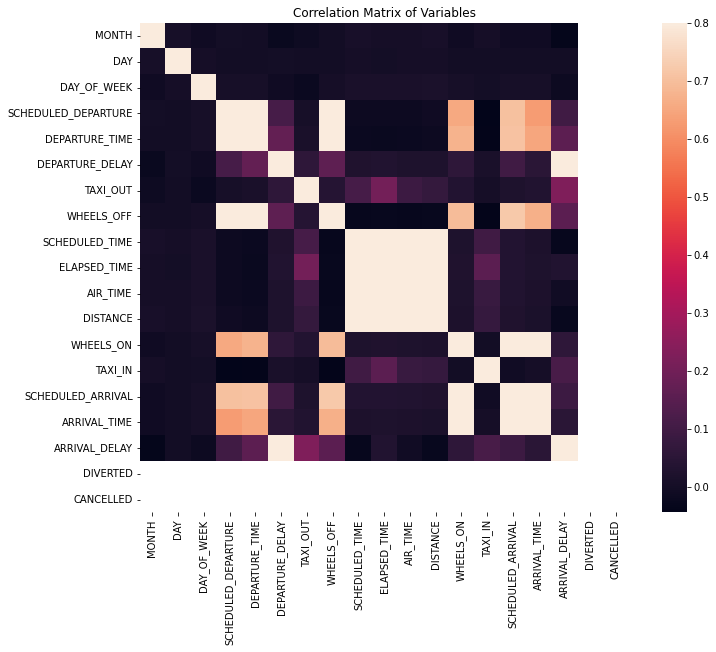

In [ ]:
corrmat = flights.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Correlation Matrix of Variables")
plt.show()

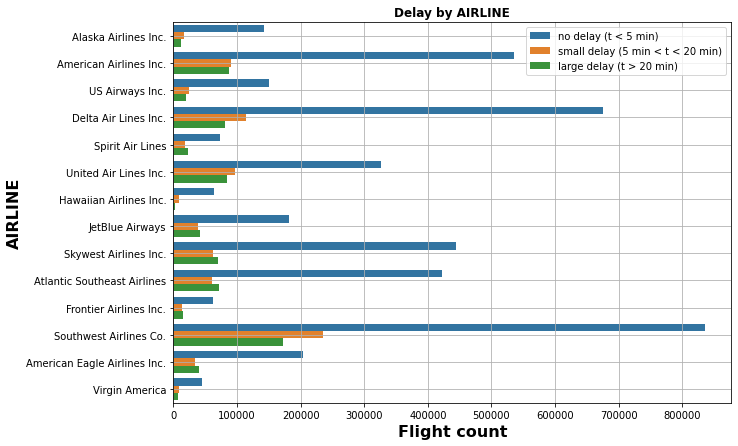

In [ ]:
def delay_by_attribute(attribute, df=flights, figsize=(10, 7)):
    delay_type = lambda x: ((0,1)[x > 5],2)[x > 25]
    flights['DELAY_TYPE'] = flights['DEPARTURE_DELAY'].apply(delay_type)
    
    plt.figure(1, figsize=figsize)
    ax = sns.countplot(y=attribute, hue='DELAY_TYPE', data=df)
    
    plt.xlabel('Flight count', fontsize=16, weight='bold')
    plt.ylabel(attribute, fontsize=16, weight='bold')
    plt.title(f'Delay by {attribute}', weight='bold')
    L = plt.legend()
    L.get_texts()[0].set_text('no delay (t < 5 min)')
    L.get_texts()[1].set_text('small delay (5 min < t < 20 min)')
    L.get_texts()[2].set_text('large delay (t > 20 min)')
    plt.grid(True)
    plt.show()

delay_by_attribute('AIRLINE')

As can be seen above, Southwest Airlines have the most flights therefore they have the most delays. However, most of those are either non-existent or short ones, not heavily impacting the fliers' journey. Concluding from the graph, the airlines with the lest significant delays compared to all flights, are American Airways and Delta Air Lines.

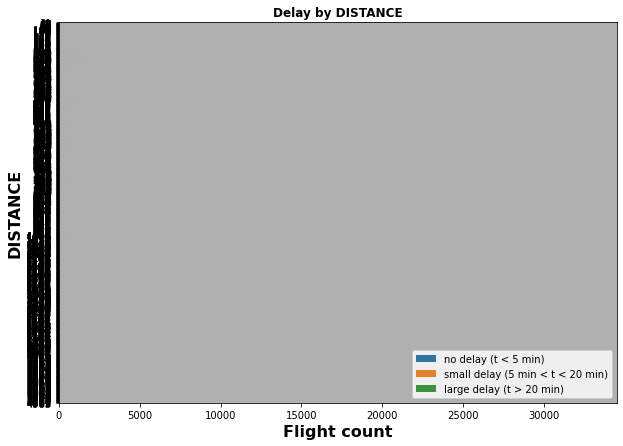

In [ ]:
delay_by_attribute('DISTANCE')

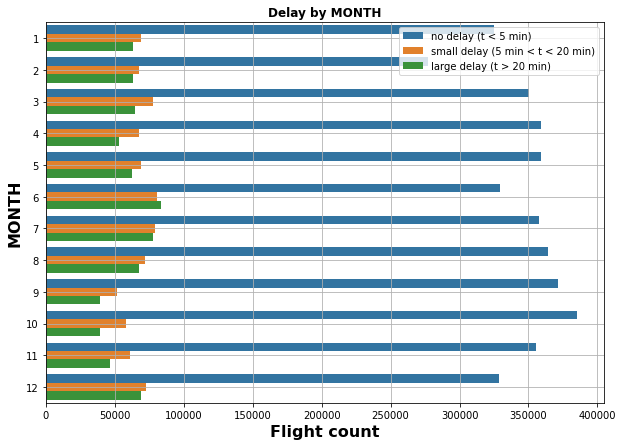

In [ ]:
delay_by_attribute('MONTH')

Most longer delays happen during holidays, i.e. summer vacations (June, July, August) and Christmas (december), while not closely correlated with the increase of flights in total.

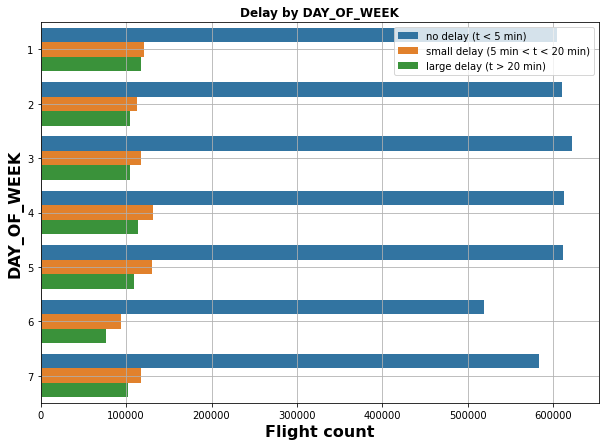

In [ ]:
delay_by_attribute('DAY_OF_WEEK')

While mostly consistent throughout the week, longest delays occur on Thursday, Friday, and Sunday. The volume of flights is lowest on Saturday.

##Prediction models

In [ ]:
data = flights.values
X, y = data[:,:-1], data[:,-1]

In [ ]:
data

array([[1, 1, 4, ..., 0, 'Alaska Airlines Inc.', 0],
       [1, 1, 4, ..., 0, 'Alaska Airlines Inc.', 0],
       [1, 1, 4, ..., 0, 'Alaska Airlines Inc.', 0],
       ...,
       [12, 31, 4, ..., 0, 'Virgin America', 0],
       [12, 31, 4, ..., 0, 'Virgin America', 0],
       [12, 31, 4, ..., 0, 'Virgin America', 0]], dtype=object)

In [ ]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13, stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

In [ ]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

###Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

In [ ]:
LogReg = LogisticRegression


In [ ]:
#model evaluation
print('Accuracy: ', accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print("F1:",recall_score(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

###Random Forest

In [ ]:
###Random Forest

In [ ]:
true = []
predicted_forest = []

for train_index, val_index in StratifiedKFold(n_splits=3).split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [ ]:
 model_forest = RandomForestClassifier(n_estimators=1000, min_samples_leaf=3, max_depth=5)
    model_forest.fit(X_train, y_train)
    true.extend(y_val)
    predicted_tree.extend(model_tree.predict(X_val))

In [ ]:
print('Forest')
print(classification_report(true, predicted_forest))

In [ ]:
cm = confusion_matrix(true, predicted_tree)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

###SVC

In [ ]:
def validation_results(model=SVC()):
    true = []
    predicted = []

    for train_index, val_index in StratifiedKFold(10).split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index],X_train.iloc[val_index] 
        y_tr, y_val = y_train.iloc[train_index],y_train.iloc[val_index]
        model.fit(X_tr, y_tr)
        true.extend(y_val)
        predicted.extend(model.predict(X_val))
    print(classification_report(true, predicted))

In [ ]:
validation_results(model=SVC(random_state=13))

In [ ]:
sns.heatmap(confusion_matrix(y_test, model_svm.predict(X_test)), annot=True, fmt='d')
plt.show()